## Entrega Final: Data Science <br> **Andrés Burbano**
####  ***Caso: Campaña de Marketing de un banco de Portugal*** 
##### Fuente dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing


## **Introducción:**

El dataset "Bank Marketing Data" contiene información recopilada durante una campaña de marketing realizada por un banco portugués. El objetivo de la campaña era promocionar depósitos a plazo fijo entre los clientes del banco. El dataset incluye información sobre características demográficas y financieras de los clientes, así como detalles sobre la campaña de marketing y **si los clientes contrataron o no un depósito a plazo fijo**. Con más de 15 atributos y más de 10,000 registros, este dataset proporciona una gran cantidad de datos para analizar y extraer información valiosa.

### **Contexto empresarial**
La empresa bancaria está interesada en mejorar sus prácticas de marketing y aumentar la eficacia de sus campañas de promoción de depósitos a plazo fijo. En los últimos años, se ha observado una tasa de conversión relativamente baja en las campañas, lo que sugiere que no se está llegando eficazmente al público objetivo. La gerencia sospecha que una de las razones detrás de esta baja tasa de conversión podría ser una posible discriminación en la distribución de las ofertas de depósitos a plazo fijo entre diferentes segmentos de clientes.

#### ***Hipótesis:***
*Puede existir una disparidad en la distribución de ofertas de depósitos a plazo fijo entre diferentes grupos demográficos de clientes. Específicamente, se sospecha que puede haber diferencias significativas en la tasa de conversión de clientes basadas en características demográficas como edad, estado civil, educación, etc.*. Por otra parte, la forma en como se realizó la campaña puede influir: Pej. duración de la llamada.

En el presente Notebook trataremos de comprobar estas hipótesis:

> **1**. La **edad adulta (18-35 años)** podría ser determinante puesto que en este rango de edad se adquiere una conciencia económica para hacer la inversión de un depósito a plazo fijo.

> **2**. La **las llamadas que duran menos tiempo** son las que muestran que el cliente no está interesado en la oferta

### **Problema empresarial**
Como parte de los esfuerzos para mejorar la efectividad de las campañas de marketing, el banco desea investigar si existe alguna disparidad en la distribución de ofertas de depósitos a plazo fijo entre diferentes grupos demográficos de clientes. Específicamente, se preguntan: "¿Hay diferencias significativas en la tasa de conversión de clientes basadas en características demográficas como edad, estado civil, educación, etc.?"

### **Contexto analítico**

Para abordar este problema, utilizaremos el dataset que contiene información detallada sobre los clientes del banco, así como detalles sobre la campaña de marketing y si los clientes contrataron o no un depósito a plazo fijo. El enfoque analítico implicará un análisis exploratorio de datos para comprender la distribución de las ofertas de depósitos a plazo fijo entre diferentes segmentos de clientes. Luego, se aplicarán técnicas estadísticas y de modelado para identificar cualquier disparidad en la tasa de conversión de clientes y determinar los factores que podrían estar contribuyendo a esta disparidad. Esto permitirá mejorar estrategias de marketing y aumentar la eficacia de campañas de promoción de depósitos a plazo fijo.

### **Variables del dataset:**

1. **age**: edad (numérico)
2. **job**: trabajo: tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "gerencia", "ama de casa", "emprendedor", "estudiante", "trabajador", "autónomo", "jubilado", "técnico", "servicios")
3. **marital**: marital status - estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
4. **education**: educación (categórico: "desconocido", "secundaria", "primaria", "terciaria")
5. **default**: incumplimiento: ¿tiene crédito en incumplimiento? (binario: "sí", "no")
6. **balance**: saldo: saldo promedio anual, en euros (numérico)
7. **housing**: vivienda: ¿tiene préstamo hipotecario? (binario: "sí", "no")
8. **loan**: préstamo: ¿tiene préstamo personal? (binario: "sí", "no")

#### Relacionado con el último contacto de la campaña actual:
9. **contact**: contacto: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
10. **day**: día: último día de contacto del mes (numérico)
11. **month**: mes: último mes de contacto del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")
12. **duration**: duración: duración del último contacto, en segundos (numérico)

#### Otros atributos
13. **campaign**: campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
14. **pdays**: pdías: número de días que han pasado desde el último contacto del cliente en una campaña anterior (numérico, -1 significa que el cliente no fue contactado anteriormente)
15. **previous**: anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
16. **poutcome**: presultado: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

#### Variable de Salida (objetivo deseado target):
17. **y**: y: ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no")

## EDA (Exploración de data)

In [2]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np


import matplotlib.pyplot       as plt
import seaborn                 as sns
import matplotlib              as mpl

#%matplotlib inline

In [3]:
# Configurando matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

In [4]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [5]:
# Configurando seaborn
sns.set_style(style="white")
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

In [6]:
# (Opción 1) Importar Dataset desde GitHub

url = 'https://raw.githubusercontent.com/andres-coder-dev/entrega-ds-f/main/Dataset/bank%2Bmarketing/bank-full.csv'
Data = pd.read_csv(url, delimiter=';')

In [7]:
# (Opción 2) Importarlo desde Local
# path = './Dataset/bank+marketing/'
# Data = pd.read_csv(path+'bank-full.csv', delimiter=';')

In [8]:
# Visualización del DataFrame
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# Determinar la forma del dataset: Features (Características/Columnas/Variables) e Instances (Instancias/Filas) 
Data.shape

(45211, 17)

In [10]:
# Características del dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Este resultado muestra que el dataset tiene 17 columnas y 45211 filas. Estas representan 17 variables (características) y 45211 registros, con ningún dato faltante (non-null), también muestra que hay 7 variables numéricas (int64) y 10 categóricas (object)

## Manejo de datos nulos

In [11]:
# Procedemos a describir el dataset: (incluyendo todas las columnas)
Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [12]:
# ¿Hay nulos?
Data.isnull().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [13]:
# Usamos la biblioteca missingno
import missingno as msno

<Axes: >

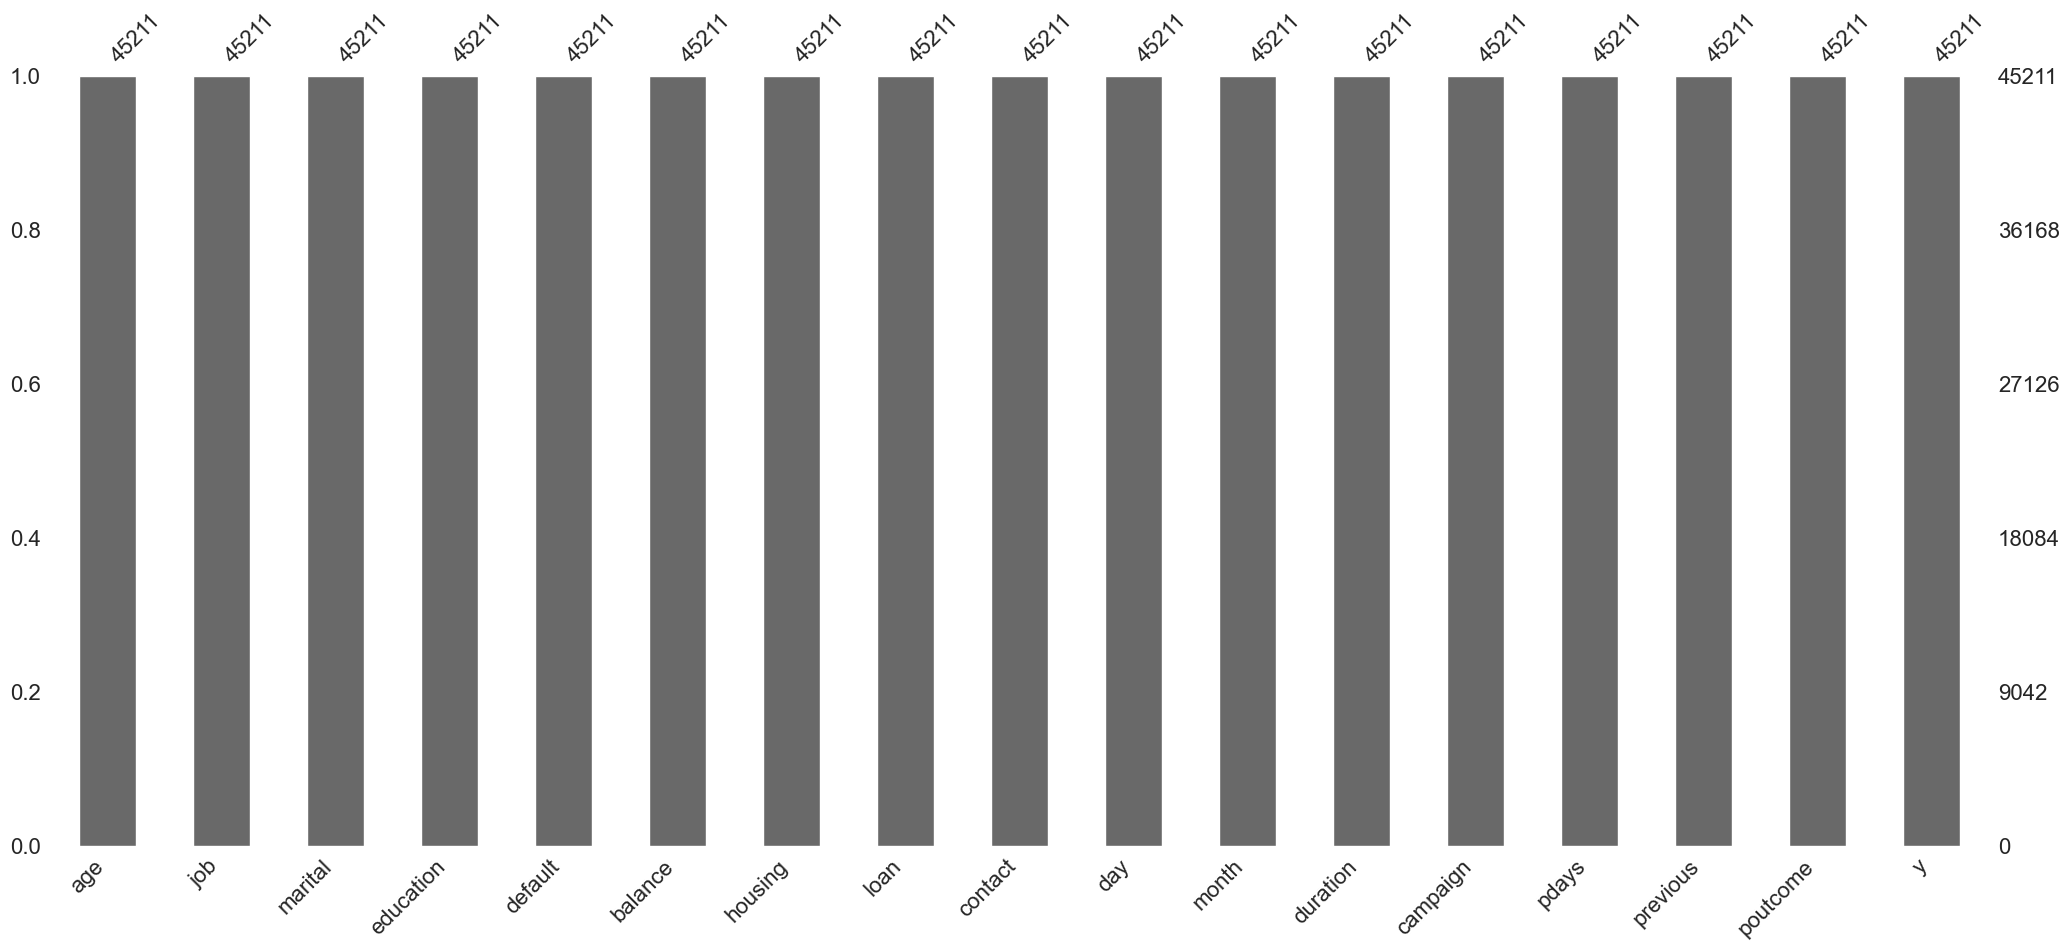

In [14]:
# Ahora hagamos ina visualización de los datos nulos por columna
msno.bar(Data)

### **Conclusión sobre datos nulos:**
### *No se observan valores que sean errores, tampoco ausencia de valores*

### **Exploración Inicial**

#### **1.** Análisis de la variable objetivo (si un cliente contrató o no un depósito a plazo fijo), variable 'y'

y
no     39922
yes     5289
Name: count, dtype: int64


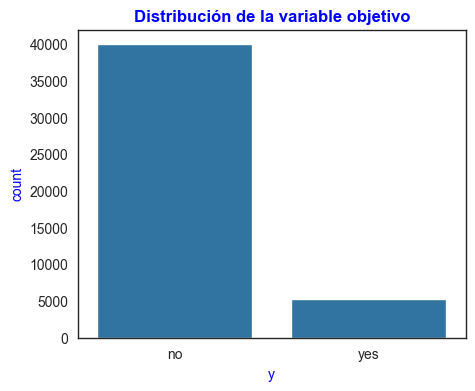

In [34]:
print(Data['y'].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x='y', data=Data)
plt.title('Distribución de la variable objetivo')
plt.show()


#### **Conclusión de la gráfica:**
Siendo la variable objetivo 'y' indica si un cliente contrató o no un depósito a plazo fijo. <br>
Entonces se puede concluir que **la mayoría** de los clientes no contrataron un depósito a plazo fijo.

### **2. Exploración de variables:**

##### **2.1** ***Variables CATEGÓRICAS***: *'job', 'marital', 'education', 'contact', 'month'*


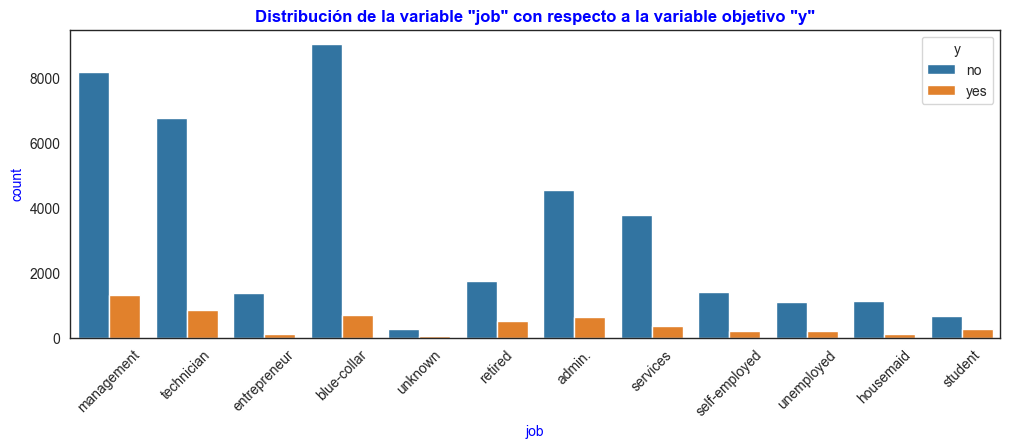

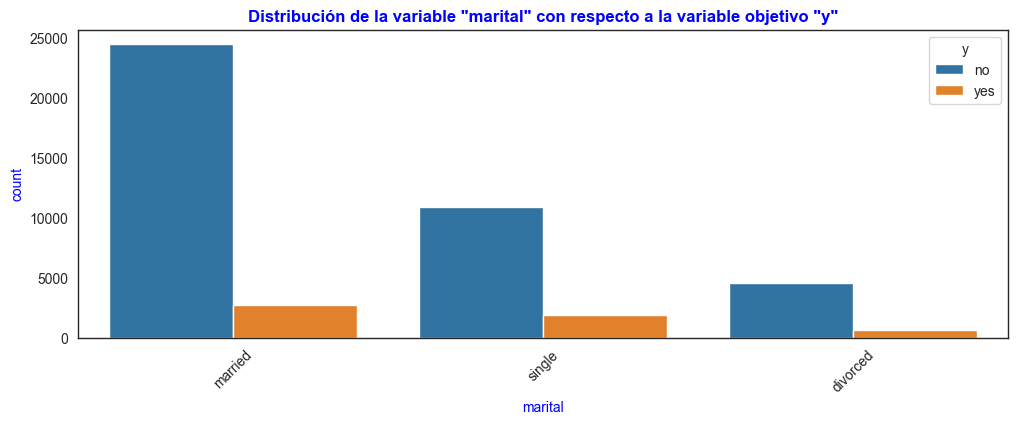

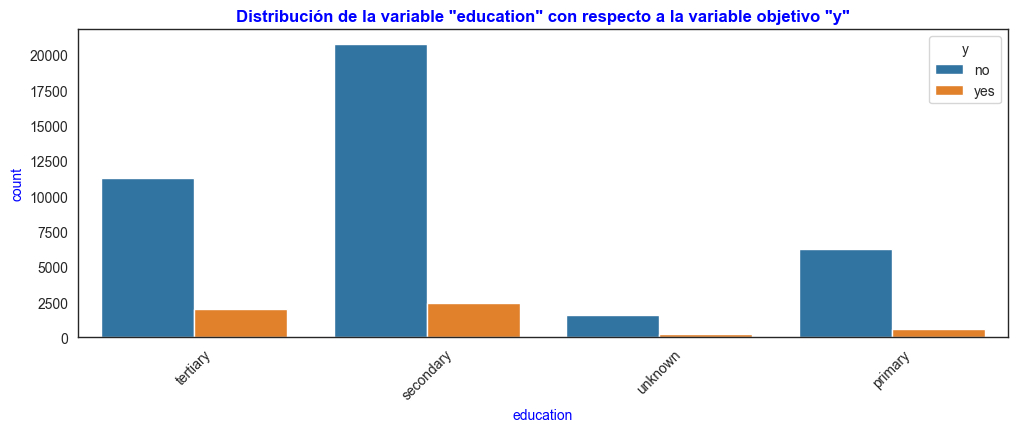

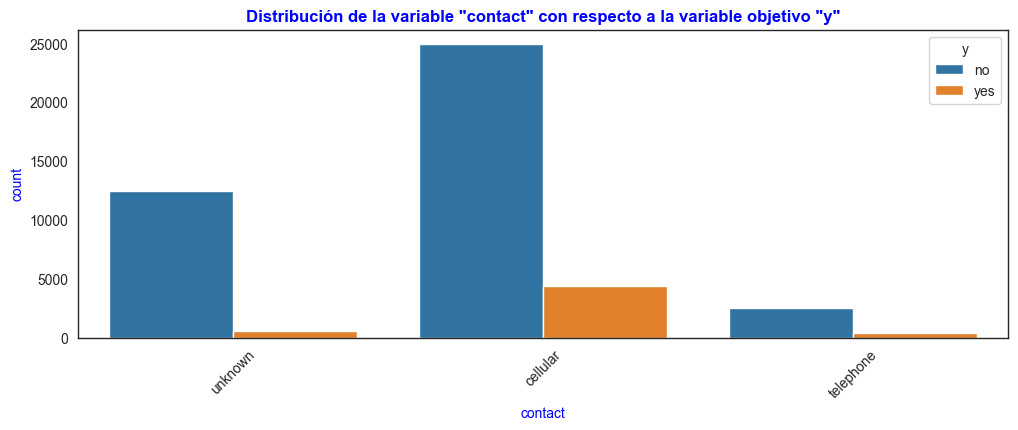

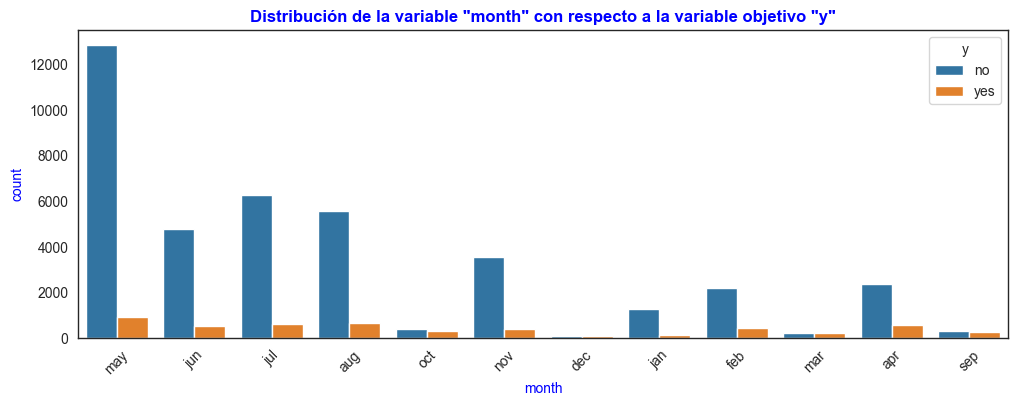

In [39]:
categorical_vars = ['job', 'marital', 'education', 'contact', 'month']

for var in categorical_vars:
    plt.figure(figsize=(12,4))
    sns.countplot(x=var, hue='y', data=Data)
    plt.title(f'Distribución de la variable "{var}" con respecto a la variable objetivo "y"')
    plt.xticks(rotation=45)
    plt.show()

#### **Conclusión de las gráficas:**
De las anteriores gráficas que muestran la distribución de la variable objetivo 'y' se puede concluir que: las variables ***'job', 'marital', 'education', 'contact', 'month'*** muestran diferencias en la distribución entre las clases de la variable objetivo, lo que sugiere que pueden servir para predecir si un cliente contratará o no un depósito a plazo fijo.



##### **2.2** ***Variables NUMÉRICAS***: *'age', 'duration'*

                age      duration
count  45211.000000  45211.000000
mean      40.936210    258.163080
std       10.618762    257.527812
min       18.000000      0.000000
25%       33.000000    103.000000
50%       39.000000    180.000000
75%       48.000000    319.000000
max       95.000000   4918.000000


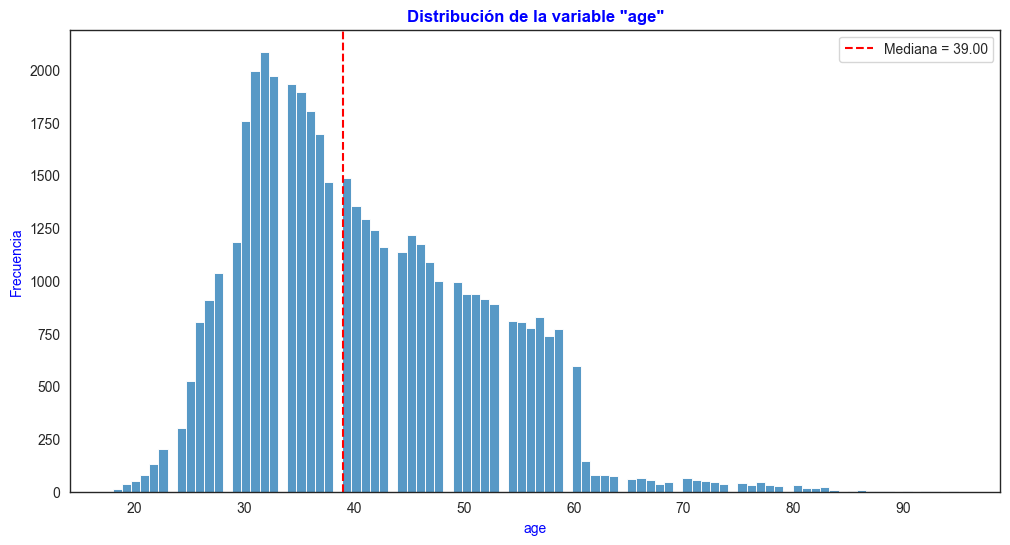

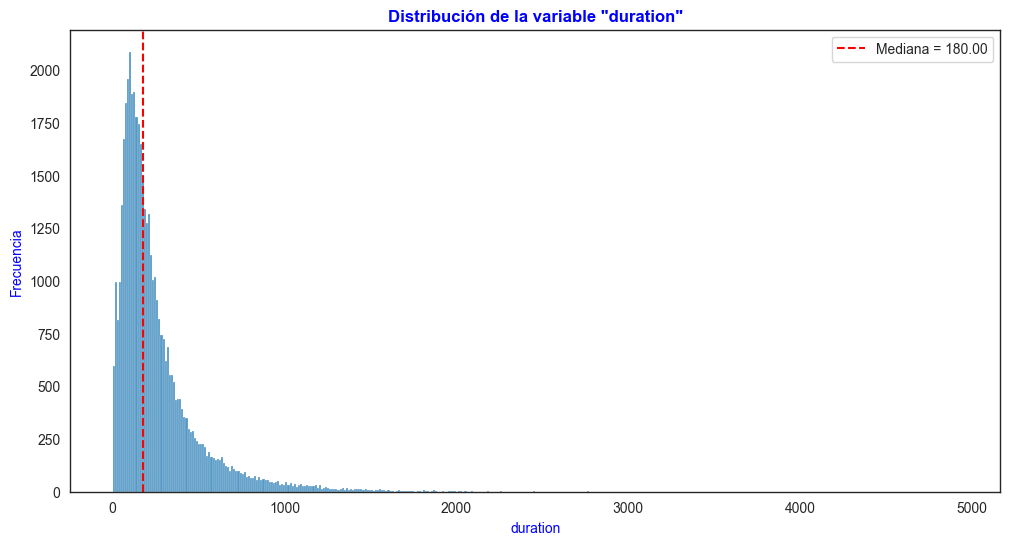

In [41]:
# Descripción de las variables numéricas
print(Data[numerical_vars].describe())

for var in numerical_vars:
    plt.figure(figsize=(12, 6))
    sns.histplot(Data[var])
    plt.axvline(Data[var].median(), color='red', linestyle='--', label=f'Mediana = {Data[var].median():.2f}')
    plt.title(f'Distribución de la variable "{var}"')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

### **Conclusión de las gráficas:**

#### Variable **Age** (Edad):

* **Distribución**: La distribución de la variable "Age" parece seguir una distribución casi normal, con la mayoría de los clientes concentrados entre los 30 y los 50 años.
* **Mediana**: La mediana de la edad de los clientes es de aproximadamente 40 años, lo que significa que la mitad de los clientes tienen menos de 40 años y la otra mitad tiene más de 40 años.

#### Variable **Duration** (Duración de la llamada):

* **Distribución**: La distribución de la duración de la llamada parece ser asimétrica positiva, con la mayoría de las llamadas siendo de corta duración.
* **Mediana**: La mediana de la duración de la llamada es de aproximadamente 180 segundos, lo que significa que la mitad de las llamadas duran menos de 180 segundos y la otra mitad dura más.

### **3. Exploración de relaciones con la variable objetivo:**

#### **3.1 Edad y Variable objetivo**

Ahora, para dar continuidad con las hipótesis planteadas exploraremos la relación entre edad "Age" y la variable objetivo "y "

/var/folders/5q/wsyqdjzx51z43fj89h3y8_xc0000gn/T/ipykernel_23296/759594316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=Data, palette='husl')


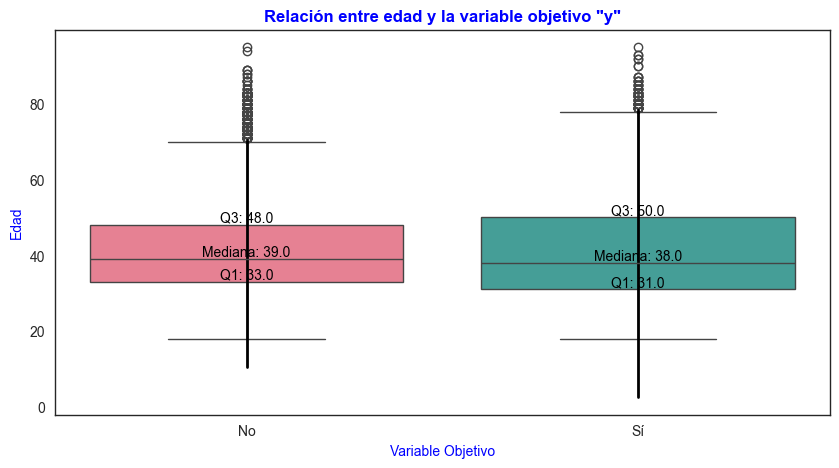

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='y', y='age', data=Data, palette='husl')
plt.title('Relación entre edad y la variable objetivo "y"')

# Añadir mediana, cuartiles y bigotes
medians = Data.groupby('y')['age'].median().values
for i in range(len(medians)):
    plt.text(i, medians[i], f'Mediana: {medians[i]}', ha='center', va='bottom', color='black', fontsize=10)

q1 = Data.groupby('y')['age'].quantile(0.25).values
q3 = Data.groupby('y')['age'].quantile(0.75).values
for i in range(len(q1)):
    plt.text(i, q1[i], f'Q1: {q1[i]}', ha='center', va='bottom', color='black', fontsize=10)
    plt.text(i, q3[i], f'Q3: {q3[i]}', ha='center', va='bottom', color='black', fontsize=10)

whiskers = [(q1[i] - 1.5 * (q3[i] - q1[i]), q3[i] + 1.5 * (q3[i] - q1[i])) for i in range(len(q1))]
for i in range(len(whiskers)):
    plt.plot([i, i], [whiskers[i][0], whiskers[i][1]], color='black', linestyle='-', linewidth=2)

plt.ylabel('Edad')
plt.xlabel('Variable Objetivo')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()



#### **Conclusiones del boxplot**:
  * Los clientes más mayores tienden a contratar depósitos a plazo fijo en mayor proporción que los clientes más jóvenes.
  * La dispersión de las edades para los clientes que contrataron un depósito a plazo fijo ('Sí') es un poco mayor que para aquellos que no contrataron ('no').
  * Hay más valores atípicos a edades más avanzadas entre los clientes que no contrataron un depósito a plazo fijo ('no').

#### **3.2 Duración llamada y Variable objetivo**

Ahora, con respecto a la hipótesis planteadas sobre la duración de la llamada, graficaremos un "boxplot"

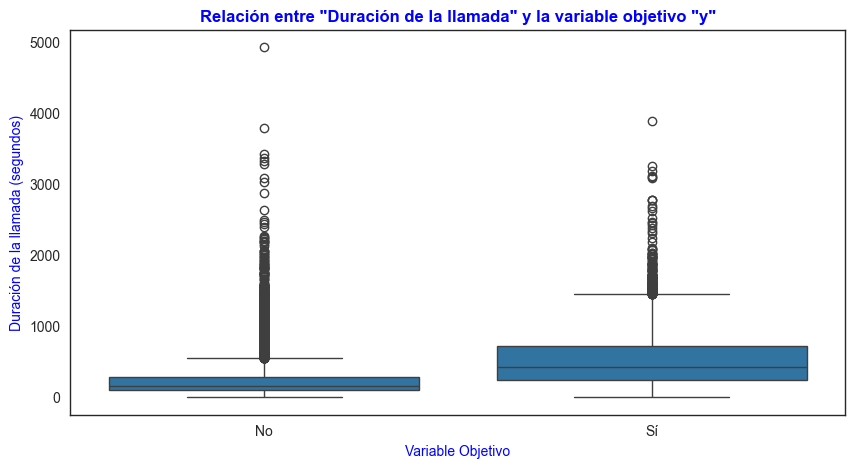

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y', y='duration', data=Data)
plt.title('Relación entre "Duración de la llamada" y la variable objetivo "y"')
plt.xlabel('Variable Objetivo')
plt.ylabel('Duración de la llamada (segundos)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

### **Conclusiones del boxplot**:

* La mediana de la duración de la llamada para los clientes que contrataron un depósito a plazo fijo ('Sí') parece ser mayor que la mediana de la duración de la llamada para los clientes que no contrataron ('No'). Esto sugiere que **las llamadas más largas tienden a ser más efectivas en la contratación de depósitos a plazo fijo.**. Esto puede ser muy útil para ajustar estrategias de marketing y optimizar el tiempo de los agentes de ventas.

Con lo anterior, se **comprueba la hipótesis**:
> **2**. La **las llamadas que duran menos tiempo** son las que muestran que el cliente no está interesado en la oferta

### **4 Exploración de Distribución creando categorías entre rangos de edades**
A continuación se muestran gráficas de distribución creando los rangos de edades así: Joven (18-35), Adulto (36-60), Adulto-mayor(>61)

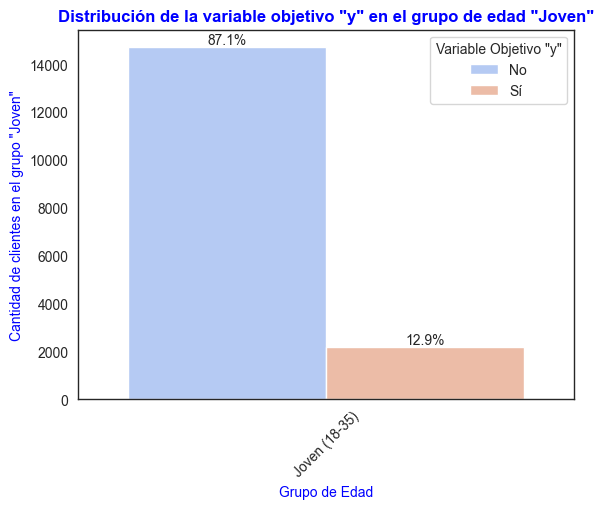

In [23]:
# Segmentar edades en grupos: 
Data['age_group'] = pd.cut(Data['age'], bins=[18, 35], labels=['Joven (18-35)'])


# Filtrar solo el grupo de edad
Data_joven = Data[Data['age_group'] == 'Joven (18-35)']

ax = sns.countplot(x='age_group', hue='y', data=Data, palette='coolwarm')

# Cantidad total
total_joven = Data_joven['age_group'].count()

# anotar las barras con fmt de matplotlib v3.7.0  (Muestra porcentajes sobre cada barra)
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total_joven)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total_joven)*100:0.1f}%')

plt.title('Distribución de la variable objetivo "y" en el grupo de edad "Joven"')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de clientes en el grupo "Joven"')
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo "y"', labels=['No', 'Sí'])
plt.show()



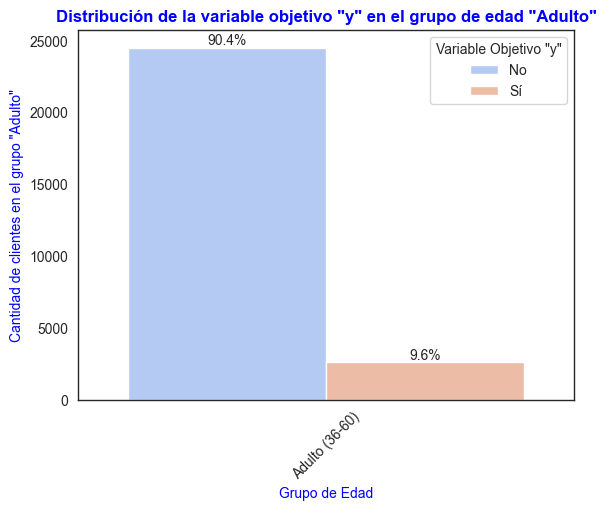

In [24]:
# Segmentar edades en grupos: 
Data['age_group'] = pd.cut(Data['age'], bins=[35, 60], labels=['Adulto (36-60)'])


# Filtrar solo el grupo de edad
Data_adulto = Data[Data['age_group'] == 'Adulto (36-60)']

ax = sns.countplot(x='age_group', hue='y', data=Data, palette='coolwarm')

# Cantidad total
total_adulto = Data_adulto['age_group'].count()

# anotar las barras con fmt de matplotlib v3.7.0  (Muestra porcentajes sobre cada barra)
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total_adulto)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total_adulto)*100:0.1f}%')


plt.title('Distribución de la variable objetivo "y" en el grupo de edad "Adulto"')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de clientes en el grupo "Adulto"')
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo "y"', labels=['No', 'Sí'])
plt.show()


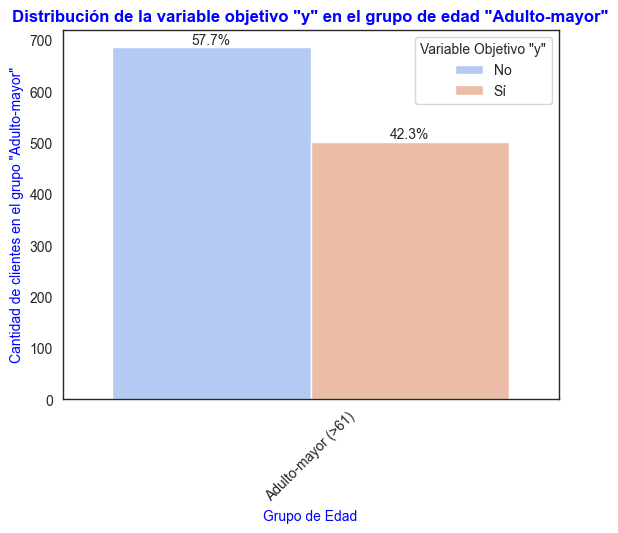

In [25]:
# Segmentar edades en grupos: 
Data['age_group'] = pd.cut(Data['age'], bins=[60, Data['age'].max()], labels=['Adulto-mayor (>61)'])


# Filtrar solo el grupo de edad
Data_adulto_mayor = Data[Data['age_group'] == 'Adulto-mayor (>61)']

ax = sns.countplot(x='age_group', hue='y', data=Data, palette='coolwarm')

# Cantidad total
total_adulto_mayor = Data_adulto_mayor['age_group'].count()

# anotar las barras con fmt de matplotlib v3.7.0  (Muestra porcentajes sobre cada barra)
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total_adulto_mayor)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total_adulto_mayor)*100:0.1f}%')

plt.title('Distribución de la variable objetivo "y" en el grupo de edad "Adulto-mayor"')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de clientes en el grupo "Adulto-mayor"')
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo "y"', labels=['No', 'Sí'])
plt.show()


### **Conclusión de las gráficas de distribución por grupos de edad**

* El rango de edad donde el porcentaje de clientes que tomaron el depósito a largo plazo fue el de **Adulto-mayor (> 61 años)**, lo que quiere decir que **no se comprueba** la hipótesis inicial en la cual se había planteado que podría ser el rango de **Adulto (18-35 años)**
